# Calculate Rate of Return

## Import libraries

In [1]:
# %pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

## Load data

In [3]:
PG = pd.read_csv('PG_1995-03_23_2017.csv', index_col = 'Date')
# PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [4]:
PG

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.468750,15.625000,15.437500,62.375000,15.593750,3318400
1995-01-04,15.531250,15.656250,15.312500,61.875000,15.468750,2218800
1995-01-05,15.375000,15.437500,15.218750,61.000000,15.250000,2319600
1995-01-06,15.156250,15.406250,15.156250,61.125000,15.281250,3438000
1995-01-09,15.343750,15.406250,15.187500,60.875000,15.218750,1795200
...,...,...,...,...,...,...
2017-03-17,91.449997,92.000000,90.919998,91.000000,91.000000,37010100
2017-03-20,90.959999,91.410004,90.940002,91.220001,91.220001,7772900
2017-03-21,91.300003,91.750000,91.029999,91.190002,91.190002,8211000


## Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
PG['simple_return'] = (PG['Close'] / PG['Close'].shift(1)) - 1
PG['simple_return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2017-03-17   -0.004812
2017-03-20    0.002418
2017-03-21   -0.000329
2017-03-22   -0.002193
2017-03-23   -0.002418
Name: simple_return, Length: 5596, dtype: float64

Daily return:

In [6]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.00024037714556161122

Annual return:

In [7]:
avg_returns_a = PG['simple_return'].mean() * 250
f'{avg_returns_a*100:.3f}%'

'6.009%'

Plot returns

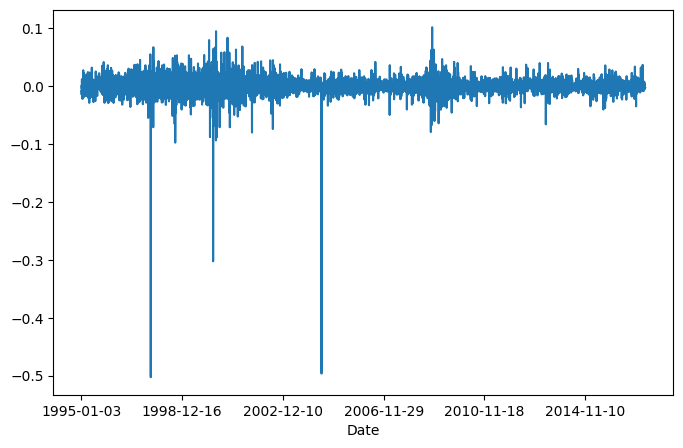

In [8]:
PG['simple_return'].plot(figsize=(8, 5))
plt.show()

## Logarithmic Rate of Return

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [9]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['log_return']

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2017-03-17   -0.004824
2017-03-20    0.002415
2017-03-21   -0.000329
2017-03-22   -0.002196
2017-03-23   -0.002421
Name: log_return, Length: 5596, dtype: float64

Annual return:

In [10]:
log_return_a = PG['log_return'].mean() * 250
f'{log_return_a*100:.3f}%'

'7.871%'

## Compare the performance of multiple stocks

In [11]:
mydata = pd.read_csv('4_stocks_1995_2017.csv', index_col='Date')
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5779 entries, 1995-01-03 to 2017-12-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5779 non-null   float64
 1   MSFT    5779 non-null   float64
 2   F       5779 non-null   float64
 3   GE      5779 non-null   float64
dtypes: float64(4)
memory usage: 225.7+ KB


In [12]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-12-06,91.250000,82.779999,12.380,17.660000
2017-12-07,90.099998,82.489998,12.530,17.709999
2017-12-08,90.370003,84.160004,12.610,17.709999
2017-12-11,90.230003,85.230003,12.580,17.650000
2017-12-12,90.055000,85.650002,12.525,17.959999


Make all the stock prices start from 100 and plot it:

$$
\frac {P_t}{P_0} * 100
$$

The idea behind is to compare the behavior of the four different stocks as if they were all starting from the same value 100.

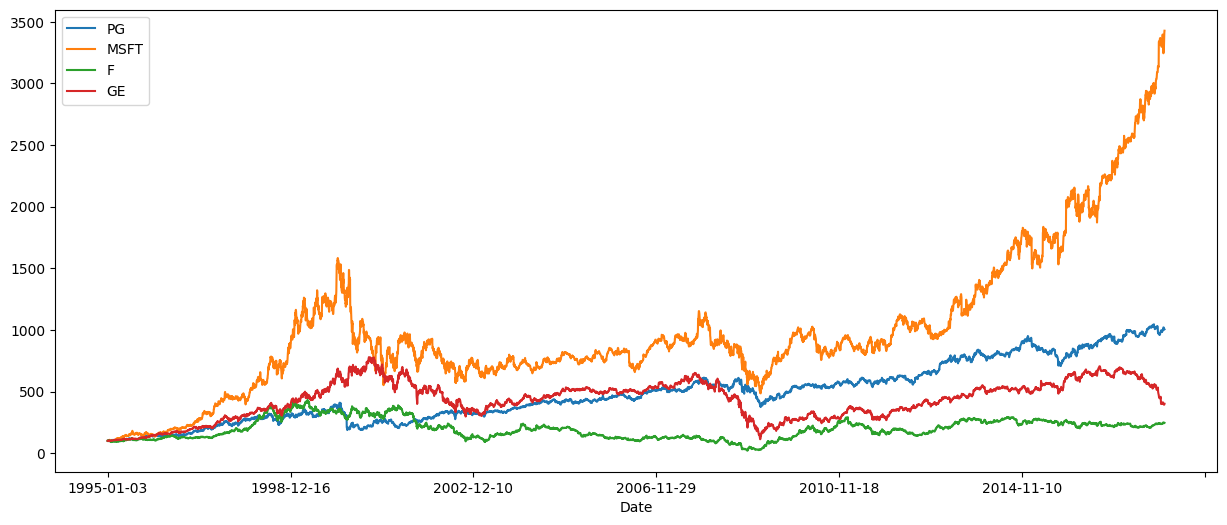

In [13]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

## Portfolio Rate of Return

In [14]:
# get the average return of each stock using sample rate of return
returns = (mydata / mydata.shift(1)) - 1
avg_returns = returns.mean() * 250
avg_returns

PG      0.125201
MSFT    0.202795
F       0.118984
GE      0.102481
dtype: float64

Calculating the Rate of Return of a Portfolio of Securities:

In [15]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
avg_return = np.dot(avg_returns, weights)
avg_return

0.13736516005309746

## Indices Rate of Return

- S&P500: ^GSPC
- NASDAQ: ^IXIC
- German DAX: ^GDAXI
- London FTSE: ^FTSE

In [16]:
ind_data = pd.read_csv('Indices_Data_01.csv', index_col='Date')
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 1996-12-31 to 2017-03-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   5091 non-null   float64
 1   ^IXIC   5091 non-null   float64
 2   ^GDAXI  5002 non-null   float64
 3   ^FTSE   4998 non-null   float64
dtypes: float64(4)
memory usage: 198.9+ KB


Compare indices performance:

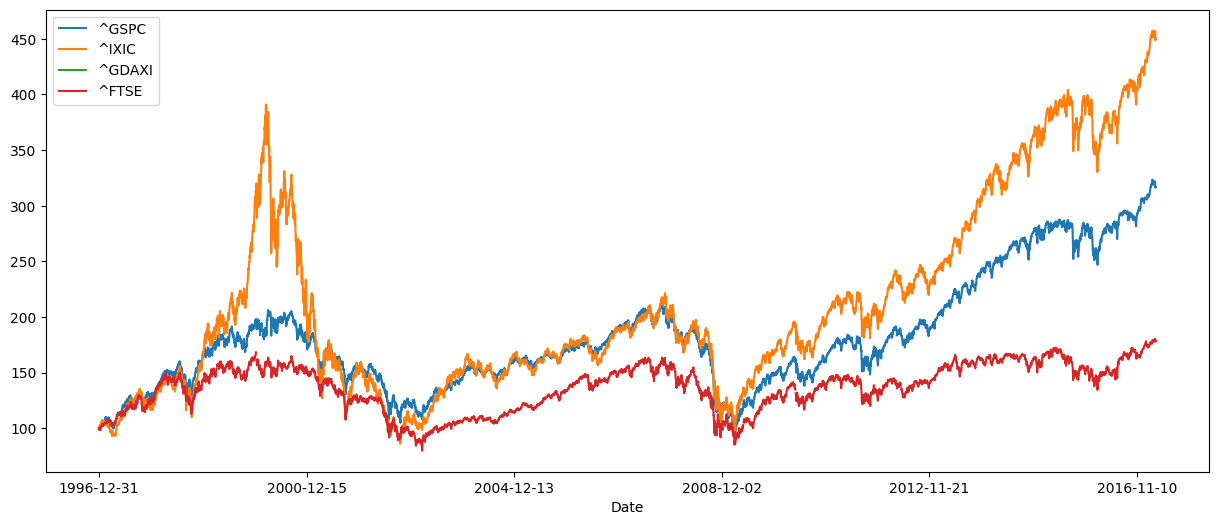

In [17]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

Calculating the Rate of Return of Indices:

In [18]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.075548
^IXIC     0.106629
^GDAXI    0.085128
^FTSE     0.041828
dtype: float64

Compare indices performance with a stock:

In [19]:
comparison = ind_data.copy()
comparison['PG'] = PG.loc['1996-12-31':'2017-03-23']['Adj Close']
comparison.drop(['^GDAXI', '^FTSE'], axis=1, inplace=True)
comparison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 1996-12-31 to 2017-03-23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   5091 non-null   float64
 1   ^IXIC   5091 non-null   float64
 2   PG      5091 non-null   float64
dtypes: float64(3)
memory usage: 159.1+ KB


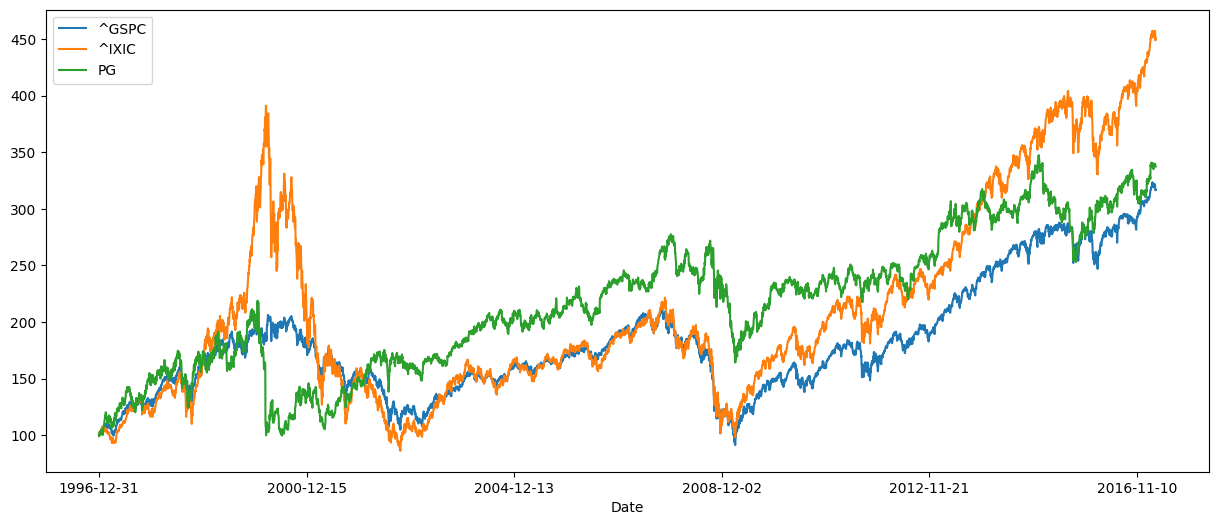

In [20]:
(comparison / comparison.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

## Another Way to Calculate Simple and Log Returns

### Simple Returns

The formula for simple returns is:

$$
\frac{P_t - P_{t-1}}{P_{t-1}}
$$


Calculate Simple Returns using the old way:

In [23]:
data = pd.read_csv('PG_1995-03_23_2017.csv', index_col = 'Date')
s_rets_1 = (data['Adj Close'] / data['Adj Close'].shift(1)) - 1
s_rets_1.head()

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
Name: Adj Close, dtype: float64

The `.pct_change()` method can obtain an identical result:

In [28]:
s_rets_2 = data['Adj Close'].pct_change()
s_rets_2.head()

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
Name: Adj Close, dtype: float64

This means the close price on 1995-01-04 was 0.8% lower than the price on 1995-01-03, the price on 1995-01-05 was 1.41% lower than the price on 1995-01-04, and so on.

### Log Returns

The formula for log returns is:

$$
ln(\frac{P_t}{P_{t-1}} ) = ln( \frac{P_t - P_{t-1}}{P_{t-1}} + \frac{P_{t-1}}{P_{t-1}}) = ln(\text{simple returns} + 1)
$$

To this moment, we applied the following formula:

In [27]:
log_rets_1 = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
log_rets_1.tail()

Date
2017-03-17   -0.004824
2017-03-20    0.002415
2017-03-21   -0.000329
2017-03-22   -0.002196
2017-03-23   -0.002421
Name: Adj Close, dtype: float64

With `.pct_change`:

In [31]:
log_rets_2 = np.log(data['Adj Close'].pct_change() + 1)
log_rets_2.tail()

Date
2017-03-17   -0.004824
2017-03-20    0.002415
2017-03-21   -0.000329
2017-03-22   -0.002196
2017-03-23   -0.002421
Name: Adj Close, dtype: float64

### `.pct_change` arguments

A few arguments can be used in the percentage change (`.pct_change`) method. 

The most important one is `period` as it specifies the difference between prices in the nominator. By default, it equals one, and that's why we obtained the same result for `s_rets_1` and `s_rets_2`.

Let's assume we would like to calculate simple returns with the following formula: 

$$
\frac{P_t - P_{t-2}}{P_{t-2}}
$$

Then, we should specify `periods = 2` in parentheses: 

In [34]:
s_rets_3 = data['Adj Close'].pct_change(periods=2)
s_rets_3.head()

Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05   -0.022044
1995-01-06   -0.012121
1995-01-09   -0.002049
Name: Adj Close, dtype: float64